# Set up and Imports

In [4]:
import kagglehub
import shutil
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from IPython.display import Image, display
from keras.utils import load_img
from PIL import ImageOps

# from keras.models import Model
# from keras.optimizers import *
# from model.utils import input_tensor, single_conv, double_conv, deconv, pooling, merge, callback

from PIL import Image, ImageOps
import numpy as np
import os

import random

import shutil

import re

import statistics

from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from IPython.display import Image as IPImage, display

# Data Cleaning

In [12]:
# Download latest version
path = kagglehub.dataset_download("aryashah2k/breast-ultrasound-images-dataset")

destination_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data"
os.makedirs(destination_path, exist_ok=True)

# move downloaded files
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), destination_path)

print("Dataset moved to:", destination_path)

Dataset moved to: /Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data


In [13]:
import os
import re

folders = ["./data/Dataset_BUSI_with_GT/benign","./data/Dataset_BUSI_with_GT/malignant", "./data/Dataset_BUSI_with_GT/normal" ]

def rename_files(folder):
    for filename in os.listdir(folder):
        new_name = re.sub(r"\s\((\d+)\)", r"_\1", filename)  
        old_path = os.path.join(folder, filename)
        new_path = os.path.join(folder, new_name)
        if old_path != new_path:
            os.rename(old_path, new_path)
            print(f'Renamed: {old_path} -> {new_path}')

# rename the files in each folder
for folder in folders:
    rename_files(folder)


## EDA


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

destination_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data/sentiment140"
os.makedirs(destination_path, exist_ok=True)

# move downloaded files
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), destination_path)

print("Dataset moved to:", destination_path)

Path to dataset files: /Users/gracefujinaga/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2
Dataset moved to: /Users/gracefujinaga/Documents/Northwestern/MSDS_453/MSDS_453/data/sentiment140


In [15]:
# number of benign, normal, malignant

# Define the folder path
folder_path = "./data/Dataset_BUSI_with_GT"

for folder in ['benign', 'malignant', 'normal'] :
    path = folder_path + '/' + folder
    file_count = len([f for f in os.listdir(path) if f.endswith('.png') and '_mask' not in f])

    print(f"Number of files of {folder} class (excluding masks): {file_count}")


Number of files of benign class (excluding masks): 437
Number of files of malignant class (excluding masks): 210
Number of files of normal class (excluding masks): 133


## Explore one image and one mask

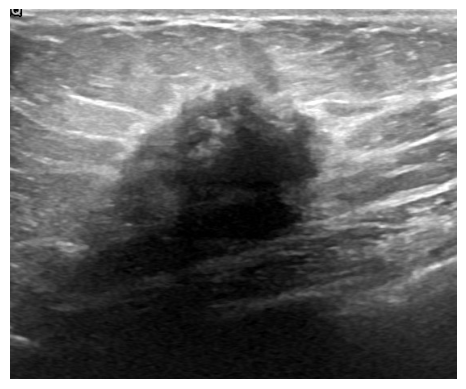

In [38]:

# Load the image
image_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant/malignant_19.png"
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


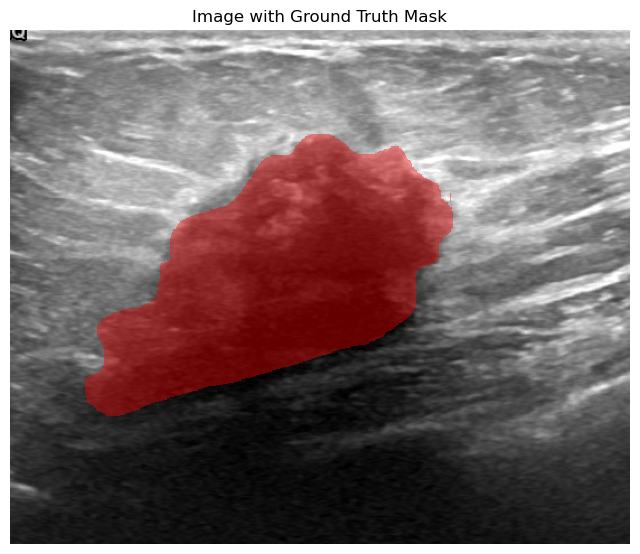

In [37]:


# Load the original image and mask
image_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant/malignant_19.png"
mask_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant/malignant_19_mask.png"

# Open the images
image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("L")  # Convert mask to grayscale

# Convert to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)

# Create an RGBA mask (red color) for overlay
# Any non-zero mask value will be displayed in red
mask_rgba = np.zeros((*mask_np.shape, 4), dtype=np.uint8)
mask_rgba[mask_np > 0] = [255, 0, 0, 100]  # Red color with alpha transparency

# Plot the original image with mask overlay
plt.figure(figsize=(8, 8))
plt.imshow(image_np)
plt.imshow(mask_rgba, cmap='Reds', interpolation='none')  # Overlay mask
plt.axis('off')
plt.title('Image with Ground Truth Mask')
plt.show()


256 256


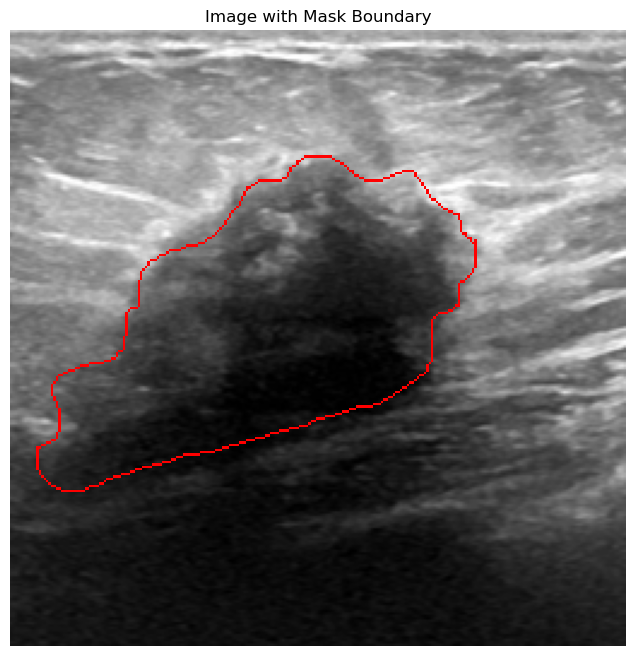

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy import ndimage

# Load the original image and mask
image_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant_resized/malignant_19.png"
mask_path = "/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant_resized/malignant_19_mask.png"
# Open images
image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("L")  # Convert mask to grayscale

width, height = image.size
print(width, height)

# Convert images to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)

# Convert mask to binary (assuming mask values > 0 are the regions of interest)
binary_mask = mask_np > 0

# Find the boundary using binary erosion
eroded_mask = ndimage.binary_erosion(binary_mask)
boundary = binary_mask ^ eroded_mask  # XOR to get boundary pixels

# Create an RGBA overlay for the boundary (e.g., red boundary)
boundary_rgba = np.zeros((*boundary.shape, 4), dtype=np.uint8)
boundary_rgba[boundary] = [255, 0, 0, 255]  # Red boundary with full opacity

# Display the image with boundary overlay
plt.figure(figsize=(8, 8))
plt.imshow(image_np)
plt.imshow(boundary_rgba, interpolation='none')  # Overlay boundary
plt.axis('off')
plt.title('Image with Mask Boundary')
plt.show()


## Determine input image size

In [44]:
from PIL import Image
import os

# Set your directory path
folder_path = './data/Dataset_BUSI_with_GT/malignant'

widths = []
heights = []

# Iterate over all files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        file_path = os.path.join(folder_path, filename)
        
        # Open and get the size of the image
        with Image.open(file_path) as img:
            width, height = img.size
            # print(f'{filename}: Width = {width}px, Height = {height}px')
            widths.append(width)
            heights.append(height)

print(min(heights))
print(max(heights))
print(statistics.mean(heights))

print(min(widths))
print(max(widths))
print(statistics.mean(widths))


332
677
493.95961995249405
190
1048
597.9026128266033


In [45]:

# Set your directory path
tumor_class = "malignant"
folder_path = f'data/Dataset_BUSI_with_GT/{tumor_class}'

for i in range(1, 438):  
    # Construct the file paths for the image and its corresponding mask
    image_file = os.path.join(folder_path, f"{tumor_class}_{i}.png")
    mask_file = os.path.join(folder_path, f"{tumor_class}_{i}_mask.png")

    # Check if both files exist
    if os.path.exists(image_file) and os.path.exists(mask_file):
        with Image.open(image_file) as img, Image.open(mask_file) as mask:
            image_size = img.size 
            mask_size = mask.size

            if image_size != mask_size:
                print(f"Size mismatch for {image_file} and {mask_file}: Image size = {image_size}")
        
print("all other mask sizes and image sizes match")


all other mask sizes and image sizes match


now we know that every image size matches the mask size - we just need to crop so that the model can run more smoothly

also note that in few images there are two tumors - we may wwant to remove this data for the time being as to not confuse the model

In [46]:

## Crop the input dataset

def process_png(input_path, output_path, target_size=(256,256)) :
    image = Image.open(input_path)
    image = resize(image, target_size)
    image.save(output_path)


def resize(img, target_size):
    current_size = img.size
    
    # Center crop if the image is larger
    if current_size[0] > target_size[0] or current_size[1] > target_size[1]:
        img = ImageOps.fit(img, target_size, method=Image.BICUBIC, centering=(0.5, 0.5))
    
    # Center pad if the image is smaller
    else:
        delta_w = target_size[0] - current_size[0]
        delta_h = target_size[1] - current_size[1]
        padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))
        img = ImageOps.expand(img, padding, fill=0)

    return img


# specify paths
input_folder = './data/Dataset_BUSI_with_GT/malignant'
output_folder = './data/Dataset_BUSI_with_GT/malignant_resized'


# process images and re
for filename in os.listdir(input_folder):
    print(filename)
    print(input_folder)

    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)
    print(output_path)

    process_png(input_path, output_path)


malignant_187_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_187_mask.png
malignant_186_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_186_mask.png
malignant_202.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_202.png
malignant_115_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_115_mask.png
malignant_114_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_114_mask.png
malignant_7_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_7_mask.png
malignant_26.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_26.png
malignant_6_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized/malignant_6

## Resize 2

In [53]:
from PIL import Image

def process_png(input_path, output_path, target_size=(256,256)) :
    image = Image.open(input_path)
    image = resize(image, target_size)
    image.save(output_path)
    
def resize(img, target_size):
    # Resize image directly to target size without cropping
    img = img.resize(target_size, Image.BICUBIC)  
    return img


# specify paths
input_folder = './data/Dataset_BUSI_with_GT/malignant'
output_folder = './data/Dataset_BUSI_with_GT/malignant_resized_2'


# process images and re
for filename in os.listdir(input_folder):
    print(filename)
    print(input_folder)

    input_path = os.path.join(input_folder, filename)
    output_path = os.path.join(output_folder, filename)
    print(output_path)

    process_png(input_path, output_path)


malignant_187_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized_2/malignant_187_mask.png
malignant_186_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized_2/malignant_186_mask.png
malignant_202.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized_2/malignant_202.png
malignant_115_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized_2/malignant_115_mask.png
malignant_114_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized_2/malignant_114_mask.png
malignant_7_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized_2/malignant_7_mask.png
malignant_26.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resized_2/malignant_26.png
malignant_6_mask.png
./data/Dataset_BUSI_with_GT/malignant
./data/Dataset_BUSI_with_GT/malignant_resiz

## Test/Train Data Split

80% train, 20% test 


In [54]:
# figure out which labels have dual tumors 
 
def count_mask_files(folder_path):
    count = 0
    set_double_tumor = set()
    for filename in os.listdir(folder_path):
        if 'mask_1.png' in filename:
            set_double_tumor.add(filename)
            count += 1
    list_double_tumor = [int(re.search(r'malignant_(\d+)_mask', name).group(1)) for name in list(set_double_tumor)]
    return count, list_double_tumor

count, double_tumors = count_mask_files("/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant_resized_2")

print(count)
print(double_tumors)


labels = count_images("/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant_resized_2")
print(len(labels))

# now remove the double tumors

labels = [label for label in labels if label not in double_tumors]
print(len(labels))

    

1
[53]
210
209


In [56]:
def split_dataset(input_folder, train_folder, test_folder, labels, train_ratio=0.8):

    # Ensure output folders exist
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # shuffle the labels
    random.shuffle(labels)

    # Split numbers into train and test sets
    split_index = int(len(labels) * train_ratio)
    train_numbers = labels[:split_index]
    test_numbers = labels[split_index:]


    # move image files based on the split
    for num in train_numbers:
        # move the image
        img_filename = f"malignant_{num}.png"
        img_source_path = os.path.join(input_folder, img_filename)
        img_output_path = os.path.join(train_folder, img_filename)
        # os.rename(img_source_path, img_output_path)
        shutil.copy(img_source_path, img_output_path)

        # move the mask to same folder but with GT 
        mask_output_path = os.path.join(train_folder, "GT")

        mask_filename = f"malignant_{num}_mask.png"
        mask_source_path = os.path.join(input_folder, mask_filename)
        mask_output_path = os.path.join(mask_output_path, mask_filename)
        # os.rename(mask_source_path, mask_output_path)
        shutil.copy(mask_source_path, mask_output_path)

    for num in test_numbers:
        # move the image
        img_filename = f"malignant_{num}.png"
        img_source_path = os.path.join(input_folder, img_filename)
        img_output_path = os.path.join(test_folder, img_filename)
        # os.rename(img_source_path, img_output_path)
        shutil.copy(img_source_path, img_output_path)

        # move the mask to same folder but with GT 
        mask_output_path = os.path.join(test_folder, "GT")

        mask_filename = f"malignant_{num}_mask.png"
        mask_source_path = os.path.join(input_folder, mask_filename)
        mask_output_path = os.path.join(mask_output_path, mask_filename)
        # os.rename(mask_source_path, mask_output_path)
        shutil.copy(mask_source_path, mask_output_path)





split_dataset("./data/Dataset_BUSI_with_GT/malignant_resized_2", "data/Dataset_BUSI_with_GT/malignant_resized_2/train", "data/Dataset_BUSI_with_GT/malignant_resized_2/test", labels)

In [52]:
# figure out which labels are test and train -- should have done this way earlier


# figure out how many labels I have
def count_images(folder_path) :
    numbers = set()
    for filename in os.listdir(folder_path):
        if '_mask.png' in filename or filename.endswith('.png'):
            parts = filename.split('_')
            for part in parts:
                if part.isdigit():
                    numbers.add(int(part))

    numbers = list(numbers)
    return numbers

test_labels = count_images("/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant_resized_2/test")
train_labels = count_images("/Users/gracefujinaga/Documents/Northwestern/MSDS_458/MSDS_458/data/Dataset_BUSI_with_GT/malignant_resized_2/train")

print(len(labels))


209


In [51]:
# double check
def count_files(path) :
    all_items = os.listdir(path)

    # Filter only files
    file_count = len([item for item in all_items if os.path.isfile(os.path.join(path, item))])

    print(f"Number of files: {file_count}")

print("test:")
count_files("data/Dataset_BUSI_with_GT/malignant_resized_2/test")

print("test GT:")
count_files("data/Dataset_BUSI_with_GT/malignant_resized_2/test/GT")

print("train:")
count_files("data/Dataset_BUSI_with_GT/malignant_resized_2/train")

print("train GT:")
count_files("data/Dataset_BUSI_with_GT/malignant_resized_2/train/GT")


test:
Number of files: 42
test GT:
Number of files: 42
train:
Number of files: 167
train GT:
Number of files: 167


# Further ideas

- compare different loss functions: dice, jaccard, binary cross entropy?
- how does the model change?
- track loss and validation loss over time
- first pass: nothing was segmented -- whoops



Ideas to fix the model:
- go back to a three class model 
- make sure Im using the right loss function
- is my training set big enough? mix in malignant?
